In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
!wget https://www.kaggle.com/datasets/danofer/sarcasm?select=train-balanced-sarcasm.csv

--2024-06-01 10:52:54--  https://www.kaggle.com/datasets/danofer/sarcasm?select=train-balanced-sarcasm.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sarcasm?select=train-balanced-sarcasm.csv’

sarcasm?select=trai     [ <=>                ]  10.89K  --.-KB/s    in 0.003s  

2024-06-01 10:52:55 (4.10 MB/s) - ‘sarcasm?select=train-balanced-sarcasm.csv’ saved [11151]



In [3]:
! pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabunbalt","key":"a4a307b915fed712cdee4e9fddddd88e"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d danofer/sarcasm

Dataset URL: https://www.kaggle.com/datasets/danofer/sarcasm
License(s): copyright-authors
 94% 204M/216M [00:01<00:00, 184MB/s]
100% 216M/216M [00:01<00:00, 123MB/s]


In [9]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [10]:
unzip_data('sarcasm.zip')

In [11]:
df = pd.read_csv('/content/train-balanced-sarcasm.csv')

In [12]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [13]:
df['label'].value_counts()

label
0    505413
1    505413
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [15]:
df['author'].value_counts(), df['subreddit'].value_counts()

(author
 Biffingston       845
 pokemon_fetish    432
 NeonDisease       422
 ShyBiDude89       404
 ivsciguy          342
                  ... 
 willyb0t            1
 skinzi              1
 AMuniBus            1
 mgnljt              1
 lastnotice          1
 Name: count, Length: 256561, dtype: int64,
 subreddit
 AskReddit                65677
 politics                 39496
 worldnews                26377
 leagueoflegends          21037
 pcmasterrace             18988
                          ...  
 LabiaGW                      1
 Expected                     1
 AnimalsStoppingFights        1
 panderingfromtheright        1
 Pandemic                     1
 Name: count, Length: 14878, dtype: int64)

In [16]:
len(df['author'].unique())

256561

In [17]:
df['score'].value_counts()

score
1       340017
2       162678
3        90290
0        58145
4        41979
         ...  
1803         1
1299         1
2104         1
1709         1
1015         1
Name: count, Length: 1291, dtype: int64

In [18]:
df = df.drop(columns = ['date', 'created_utc'])

In [19]:
df.head()

,label,comment,author,subreddit,score,ups,downs,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,Yep can confirm I saw the tool they use for th...


In [20]:
df['comment'].sample(20)

172220                                     op rmtd in secret
54945              It's cause you're not from Great Britain.
905583       Sounds like *you* should be the one in Harvard.
351399      I removed your post as it isn't zombies related.
857211                      P. Sherman 42 wallaby way sydney
736722                             Should be his normal card
536522              The great autist alliance strikes again!
711011     A green light just means that it's legal to go...
133625                                               I lol'd
59937             They use them in the Danish parliament too
760018     But then when they get seated they linger for ...
767017       Hopefully my Facebook likes end up helping too!
511494                   Doing multiple things is hard :-''(
562613     I'm sure they will include microtransactions f...
863973                                                 Ye's.
733963                                   hnnnnnnnnnggggggggg
417276     Supporter of 

In [21]:
import random
random_index = random.randint(0, len(df)-5)
for row in df[["comment", "label"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(sarcasm))" if target > 0 else "(not sarcasm)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not sarcasm)
Text:
Sex is off tonight, my cervix just opened.

---

Target: 0 (not sarcasm)
Text:
And a pony, count me in.

---

Target: 1 (sarcasm))
Text:
Yeah let's do the shitty thing he is doing on him, that's what REAL good is.

---

Target: 1 (sarcasm))
Text:
one betel addiction later

---

Target: 1 (sarcasm))
Text:
**The [Noun] of [Noun [and Other Noun]\*]** doesn't appeal to you?

---



In [22]:
import random
random_index = random.randint(0, len(df)-5)
for row in df[["parent_comment", "label"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(sarcasm))" if target > 0 else "(not sarcasm)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not sarcasm)
Text:
Why? Is it really that crazy an opinion?

---

Target: 0 (not sarcasm)
Text:
It'd be a combination of biology and technology at the molecular level. A feat of engineering for the ages.

---

Target: 0 (not sarcasm)
Text:
Dude, he just did what you wanted him to do. Don't berate him for it.

---

Target: 0 (not sarcasm)
Text:
what do you call a guy in the ocean with no arms or legs? Bob.

---

Target: 0 (not sarcasm)
Text:
A sociopath will mimic and do what is necessary to appear to have a charming personality.

---



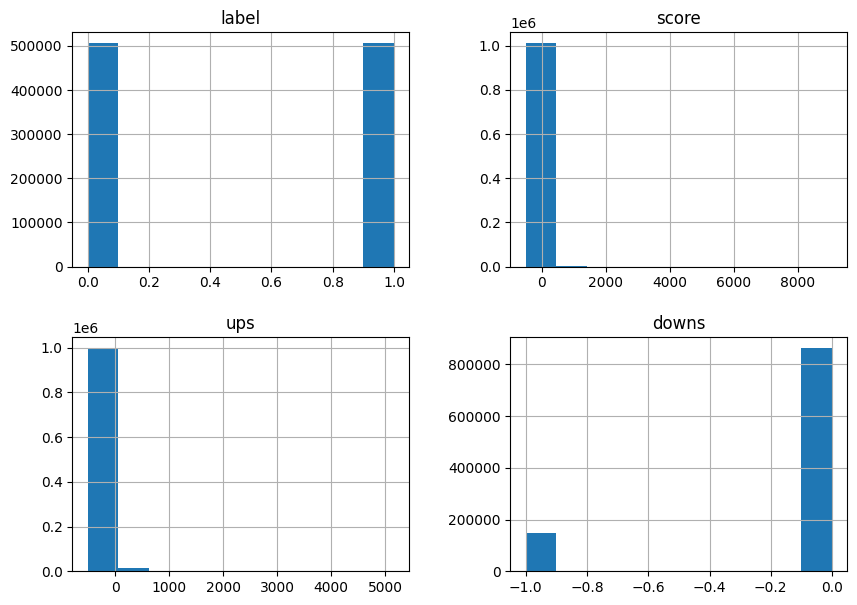

In [23]:
df.hist(figsize = (10, 7))
plt.show()

In [24]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100,
                random_state = 17, width=800, height=400)

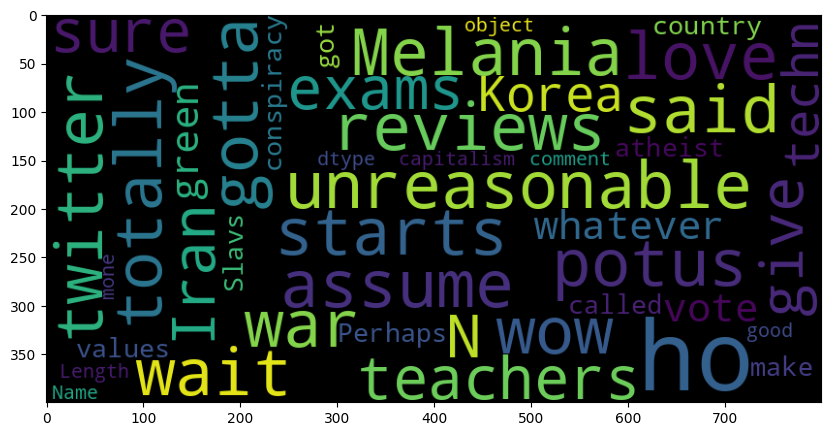

In [25]:
plt.figure(figsize = (10, 7))
wordcloud.generate(str(df.loc[df['label']==1, 'comment']))
plt.imshow(wordcloud)
plt.show()

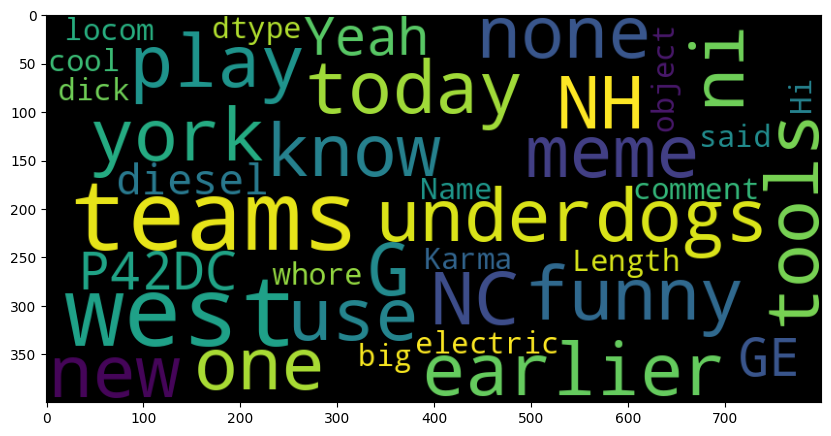

In [26]:
plt.figure(figsize = (10, 7))
wordcloud.generate(str(df.loc[df['label']==0, 'comment']))
plt.imshow(wordcloud)
plt.show()

In [27]:
df = df.dropna(how='any',axis=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010825
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010771 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010771 non-null  object
 3   subreddit       1010771 non-null  object
 4   score           1010771 non-null  int64 
 5   ups             1010771 non-null  int64 
 6   downs           1010771 non-null  int64 
 7   parent_comment  1010771 non-null  object
dtypes: int64(4), object(4)
memory usage: 69.4+ MB


In [29]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['comment'].to_numpy(), df['label'].to_numpy(), test_size = 0.25)

In [30]:
train_sentences[:10], train_labels[:10]

(array(['oh god my brain cells.',
        'But lol that 2% is the difference between dps and l33t mad deeps.',
        'But my 1v5 glock clutch is special!',
        'nice humblebrag you got there.',
        "It's weird Gent is happy with this draw given the fact Tottenham isn't exactly much better then the likes of a Lyon and Valencia (yeay I know Valencia and Wolfsburg suck right now but you get the point)",
        'One point away from my hilarious 9/11 joke',
        "I guess the reason I like the former is because I actually have Asperger's, and it's nice to see a realistic portrayal of someone with Asperger's on TV.",
        'no, trying to find 10000 options to improve dynamic q is wayyy better than just releasing solo q',
        'Best part of donating blood for drugs is you get high/drunk faster.',
        "If reddit gives a simile of the year award, I'm nominating you and yours."],
       dtype=object),
 array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0]))

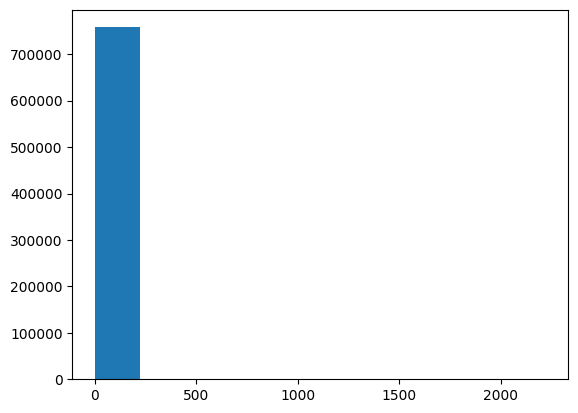

In [31]:
sent_lens = [len(sentence.split()) for sentence in train_sentences ]
plt.hist(sent_lens, bins = 10)
plt.show()

In [32]:
import numpy as np
output_seq_len = int(np.percentile(sent_lens, 98))
output_seq_len

32

In [33]:
from tensorflow.keras.layers import TextVectorization

In [34]:
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

10

In [35]:
max_vocab_length = 20000
max_length = 30

In [36]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_sequence_length = max_length)

In [37]:
text_vectorizer.adapt(train_sentences)

In [38]:
vocab = text_vectorizer.get_vocabulary()
top_5_words = vocab[:5]
bottom_5_words = vocab[-5:]
print(top_5_words)
print(bottom_5_words)
print(len(vocab))

['', '[UNK]', 'the', 'a', 'to']
['profanity', 'problemo', 'prix', 'presumed', 'prescott']
20000


In [39]:
from tensorflow.keras import layers

In [40]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                             mask_zero = True,
                            output_dim = 128,
                            input_length = max_length)

In [41]:
random_sentence = random.choice(train_sentences)
print(f"Random Sentence:\n{random_sentence}\n\nAfter Vectorization:\n{text_vectorizer(random_sentence)}\n\nAfter Embedding:\n{embedding(text_vectorizer(random_sentence))}")

Random Sentence:
Yeah that's why it took Microsoft so long to implement it huh.

After Vectorization:
[  38   53   72   11  495 1988   23  231    4 3924   11 1079    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

After Embedding:
[[ 0.03379059  0.01171849  0.02946354 ... -0.04509505  0.02438495
   0.01335266]
 [-0.00900283 -0.03788381  0.01795404 ... -0.02319679  0.00903491
   0.01770422]
 [ 0.0483187   0.01175299 -0.00385565 ... -0.01914589  0.02859553
  -0.01452123]
 ...
 [-0.00241712  0.04297444  0.04727676 ...  0.03102027  0.03708667
  -0.00292667]
 [-0.00241712  0.04297444  0.04727676 ...  0.03102027  0.03708667
  -0.00292667]
 [-0.00241712  0.04297444  0.04727676 ...  0.03102027  0.03708667
  -0.00292667]]


In [42]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset =  tf.data.Dataset.from_tensor_slices((val_sentences, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [43]:
# Baseline Model (simple TF-IDF Vectorizer with ML algorithm)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

model_0.fit(train_sentences, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [44]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [45]:
val_labels[:10]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  model_accuracy = accuracy_score(y_true, y_pred)

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}

  return model_results

<Figure size 2000x1500 with 0 Axes>

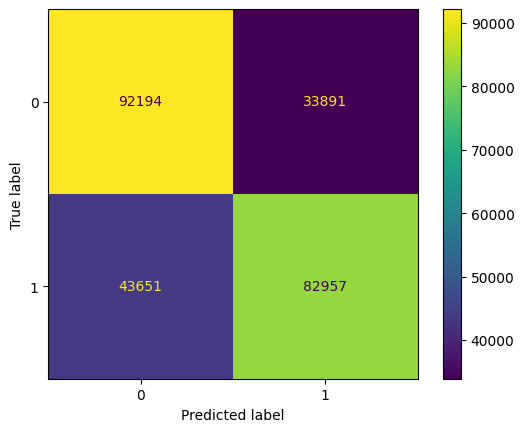

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(val_labels, baseline_preds)

plt.figure(figsize = (20, 15))
matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=model_0.classes_)
matrix.plot();
plt.show()

In [48]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 0.693137522606483,
 'precision': 0.6943459105529486,
 'recall': 0.693137522606483,
 'f1': 0.6927036933634979}

In [49]:
# Model 1 : Conv1D Model

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x  = layers.Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.MaxPooling1D()(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [50]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 30, 128)           2560000   
                                                                 
 conv1d (Conv1D)             (None, 30, 128)           82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 128)           0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0     

In [51]:
model_1_history = model_1.fit(train_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
2369/2369 [==============================] - 35s 13ms/step - loss: 0.5956 - accuracy: 0.6768 - val_loss: 0.5762 - val_accuracy: 0.6987
Epoch 2/3
2369/2369 [==============================] - 15s 7ms/step - loss: 0.5709 - accuracy: 0.7020 - val_loss: 0.5619 - val_accuracy: 0.7074
Epoch 3/3
2369/2369 [==============================] - 16s 7ms/step - loss: 0.5590 - accuracy: 0.7119 - val_loss: 0.5696 - val_accuracy: 0.7007


In [52]:
model_1_preds = tf.squeeze(tf.round(model_1.predict(val_sentences)))
model_1_preds[:10]

7897/7897 [==============================] - 34s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)>

In [53]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 0.7031734159632439,
 'precision': 0.7052058550531716,
 'recall': 0.7031734159632439,
 'f1': 0.7023831037043845}

In [113]:
def plot_loss_curves(history):

  # For accuracy
  plt.plot(history.history['accuracy'], label = "train")
  plt.plot(history.history['val_accuracy'], label = "val")
  plt.title("Accuracy Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show

  # For loss
  plt.figure()
  plt.plot(history.history['loss'], label = "train")
  plt.plot(history.history['val_loss'], label = "val")
  plt.title("Loss Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show

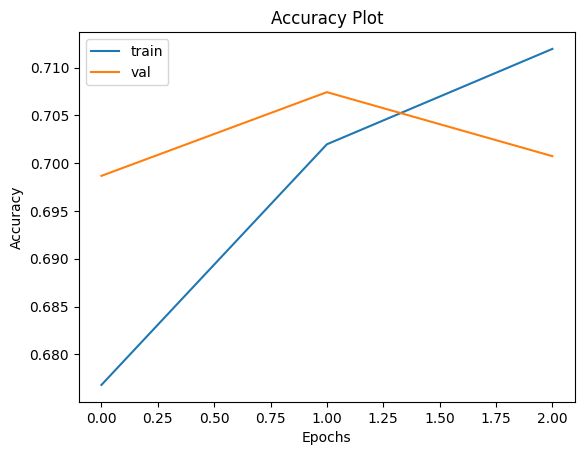

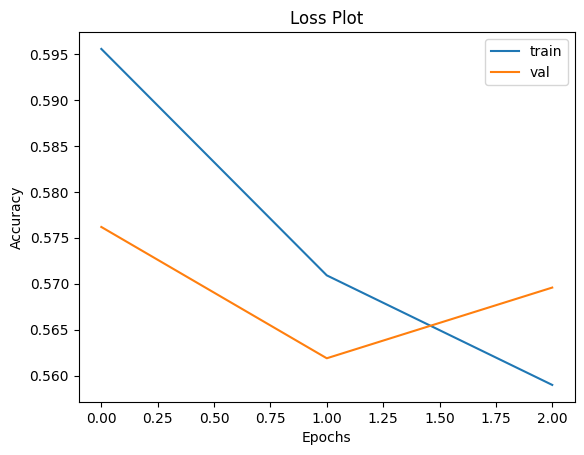

In [55]:
plot_loss_curves(model_1_history)

In [56]:
# Model_2 : Bidirectional LSTM Model

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2  = tf.keras.Model(inputs, outputs)

model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [57]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 30, 128)           2560000   
                                                                 
 bidirectional (Bidirection  (None, 30, 128)           98816     
 al)                                                             
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65  

In [58]:
model_2_history = model_2.fit(train_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
2369/2369 [==============================] - 100s 36ms/step - loss: 0.5401 - accuracy: 0.7314 - val_loss: 0.5765 - val_accuracy: 0.7000
Epoch 2/3
2369/2369 [==============================] - 66s 28ms/step - loss: 0.5213 - accuracy: 0.7414 - val_loss: 0.5731 - val_accuracy: 0.6998
Epoch 3/3
2369/2369 [==============================] - 71s 30ms/step - loss: 0.5137 - accuracy: 0.7455 - val_loss: 0.5777 - val_accuracy: 0.6960


In [59]:
model_2_preds = tf.squeeze(tf.round(model_1.predict(val_sentences)))
model_2_preds[:10]

7897/7897 [==============================] - 39s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)>

In [60]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 0.6900428583300685,
 'precision': 0.6979115401601733,
 'recall': 0.6900428583300685,
 'f1': 0.686815714046978}

In [61]:
# Create keras layer using the USE pretrained layer from tensorflow hub
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = 'USE' )

In [62]:
from tensorflow.keras import layers

inputs = layers.Input(shape = [], dtype = tf.string)
x = sentence_encoder_layer(inputs)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [63]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [64]:
model_3_history = model_3.fit(train_dataset,
                              epochs = 3,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
2369/2369 [==============================] - 44s 16ms/step - loss: 0.6005 - accuracy: 0.6712 - val_loss: 0.5880 - val_accuracy: 0.6808
Epoch 2/3
2369/2369 [==============================] - 38s 16ms/step - loss: 0.5815 - accuracy: 0.6886 - val_loss: 0.5743 - val_accuracy: 0.6926
Epoch 3/3
2369/2369 [==============================] - 39s 17ms/step - loss: 0.5695 - accuracy: 0.7002 - val_loss: 0.5680 - val_accuracy: 0.6989


In [65]:
model_3_preds = tf.squeeze(tf.round(model_3.predict(val_sentences)))
model_3_preds[:10]

7897/7897 [==============================] - 101s 13ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [66]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 0.7007633769039903,
 'precision': 0.7008293202225924,
 'recall': 0.7007633769039903,
 'f1': 0.7007478050020158}

In [67]:
print(tf.__version__)

2.15.0


In [68]:
# Model 4 : Concatinating the USE model with the BiLSTM model

In [96]:
# USE Model
token_inputs = layers.Input(shape = [], dtype = tf.string)
token_embedding = sentence_encoder_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_outputs)

# CNN Model

cnn_inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(cnn_inputs)
x = embedding(x)
x = layers.Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.GlobalMaxPooling1D()(x)
cnn_model = tf.keras.Model(inputs = cnn_inputs,
                           outputs = x)

# Concatinating the two models
concat_layer = layers.Concatenate()([token_model.output, cnn_model.output])

# Adding Dense outputs
dropout_1 = layers.Dropout(0.5)(concat_layer)
dense_1 = layers.Dense(128, activation = 'relu')(dropout_1)
dropout_2 = layers.Dropout(0.5)(dense_1)
final_outputs = layers.Dense(1, activation = 'sigmoid')(dropout_2)

model_4 = tf.keras.Model(inputs = [token_inputs, cnn_inputs],
                         outputs = final_outputs)

model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [97]:
train_dataset_combine = tf.data.Dataset.from_tensor_slices(((train_sentences, train_sentences), train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_combine =  tf.data.Dataset.from_tensor_slices(((val_sentences, val_sentences), val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

print(train_dataset_combine)

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [98]:
model_4_history = model_4.fit(train_dataset_combine,
                              epochs = 3,
                              steps_per_epoch = int(0.1 * len(train_dataset_combine)),
                              validation_data = val_dataset_combine,
                              validation_steps =int(0.1 * len(val_dataset_combine)))

Epoch 1/3
2369/2369 [==============================] - 60s 24ms/step - loss: 0.4456 - accuracy: 0.7931 - val_loss: 0.6703 - val_accuracy: 0.6814
Epoch 2/3
2369/2369 [==============================] - 47s 20ms/step - loss: 0.4195 - accuracy: 0.8102 - val_loss: 0.6551 - val_accuracy: 0.6856
Epoch 3/3
2369/2369 [==============================] - 46s 20ms/step - loss: 0.4053 - accuracy: 0.8165 - val_loss: 0.6813 - val_accuracy: 0.6757


In [99]:
model_4_preds = tf.squeeze(tf.round(model_4.predict(val_dataset_combine)))
model_4_preds[:10]

7897/7897 [==============================] - 107s 14ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)>

In [100]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.678534822887852,
 'precision': 0.6803662615245654,
 'recall': 0.678534822887852,
 'f1': 0.6776520665894409}

In [101]:
model_performance_df = pd.DataFrame({"Base_model(100% data)" : baseline_results,
                                     "Conv1D_model": model_1_results,
                                     "BiLSTM_model": model_2_results,
                                     "USE_model": model_3_results,
                                     "USE+CNN_model": model_4_results})

model_performance_df = model_performance_df.transpose()
model_performance_df


,accuracy,precision,recall,f1
Base_model(100% data),0.693138,0.694346,0.693138,0.692704
Conv1D_model,0.703173,0.705206,0.703173,0.702383
BiLSTM_model,0.690043,0.697912,0.690043,0.686816
USE_model,0.700763,0.700829,0.700763,0.700748
USE+CNN_model,0.678535,0.680366,0.678535,0.677652


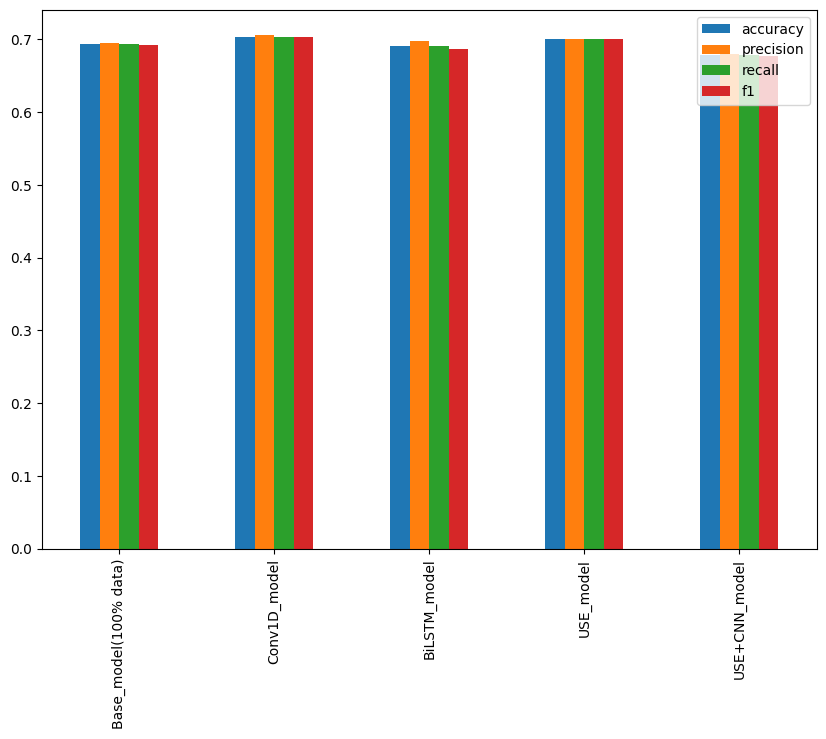

In [103]:
model_performance_df.plot(kind = 'bar', figsize = (10, 7))
plt.show()

In [108]:
# Let's train our USE model on full training_data

inputs = layers.Input(shape = [], dtype = tf.string)
x = embedding = sentence_encoder_layer(inputs)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
final_model = tf.keras.Model(inputs, outputs)

final_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [109]:
final_model_history = final_model.fit(train_dataset,
                              epochs = 3,
                              steps_per_epoch = (len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
23690/23690 [==============================] - 299s 13ms/step - loss: 0.5675 - accuracy: 0.7008 - val_loss: 0.5547 - val_accuracy: 0.7107
Epoch 2/3
23690/23690 [==============================] - 307s 13ms/step - loss: 0.5465 - accuracy: 0.7181 - val_loss: 0.5509 - val_accuracy: 0.7123
Epoch 3/3
23690/23690 [==============================] - 322s 14ms/step - loss: 0.5377 - accuracy: 0.7254 - val_loss: 0.5495 - val_accuracy: 0.7153


In [110]:
final_model_preds = tf.squeeze(tf.round(final_model.predict(val_sentences)))
final_model_preds[:10]

7897/7897 [==============================] - 126s 16ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [111]:
final_model_results = calculate_results(val_labels, final_model_preds)
final_model_results

{'accuracy': 0.7167155402009553,
 'precision': 0.7168087108312156,
 'recall': 0.7167155402009553,
 'f1': 0.716694516047307}

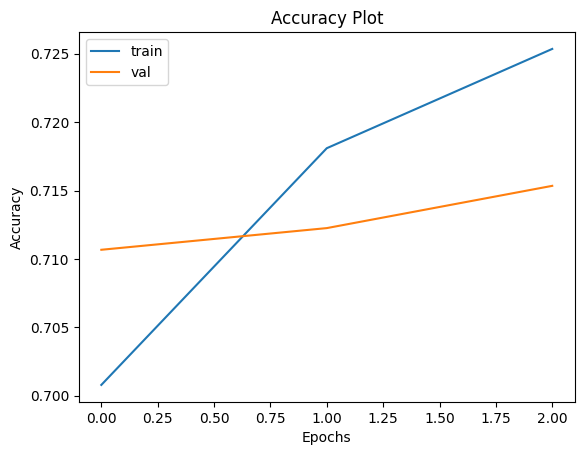

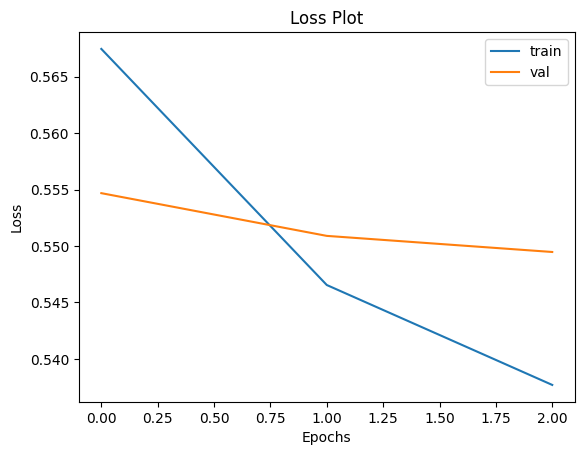

In [114]:
plot_loss_curves(final_model_history)

In [117]:
final_model.save('final_model_sarcasm_predictor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [118]:
from google.colab import files
files.download("final_model_sarcasm_predictor.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>